In [2]:
import pandas as pd
df = pd.read_csv("data/angular_velocity.csv")
df.columns = df.columns.str.strip()
df.tail()

,Time [ms],Yaw [rad],Pitch [rad],Roll [rad],Yaw velocity [rad/s],Pitch velocity [rad/s],Roll velocity [rad/s]
821,16567.1,-0.872501,-0.000611,-0.034126,-0.458955,-0.055342,0.018070
822,16587.4,-0.876930,-0.001130,-0.033409,-0.454380,-0.054359,0.033273
823,16607.6,-0.892205,-0.003548,-0.031792,-0.492344,-0.067275,0.040937
824,16627.8,-0.900944,-0.004971,-0.031345,-0.467071,-0.067305,0.031340
825,16647.9,-0.910778,-0.005367,-0.031709,-0.480413,-0.044408,0.004683


Text(0, 0.5, 'Angular velocity (deg/s)')

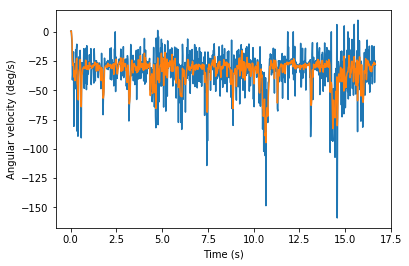

In [3]:
import math
import matplotlib.pyplot as plt

def normalise180(ang):
    ang %= 2 * math.pi
    if ang > math.pi:
        ang -= 2 * math.pi
    return ang

def circularDistance(ang1,ang2):
    return normalise180(ang1 - ang2)

vel = []
for i in range(1,len(df)):
    dt = df["Time [ms]"][i] - df["Time [ms]"][i-1]
    dtheta = circularDistance(df["Yaw [rad]"][i], df["Yaw [rad]"][i-1])
    vel.append((180 / math.pi) * dtheta / (dt / 1000))

plt.figure(1)
t = df["Time [ms]"][1:] / 1000
plt.plot(t, vel, t, df["Yaw velocity [rad/s]"][1:] * (180 / math.pi))
plt.xlabel("Time (s)")
plt.ylabel("Angular velocity (deg/s)")